<a href="https://colab.research.google.com/github/LPProjects/AnomalyDetection/blob/main/AnomalyDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
!pip install adtk yahoo-finance pandas matplotlib
!pip install yahoo-finance
from google.colab import drive 


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from adtk.data import validate_series
from adtk.visualization import plot
from adtk.detector import * 

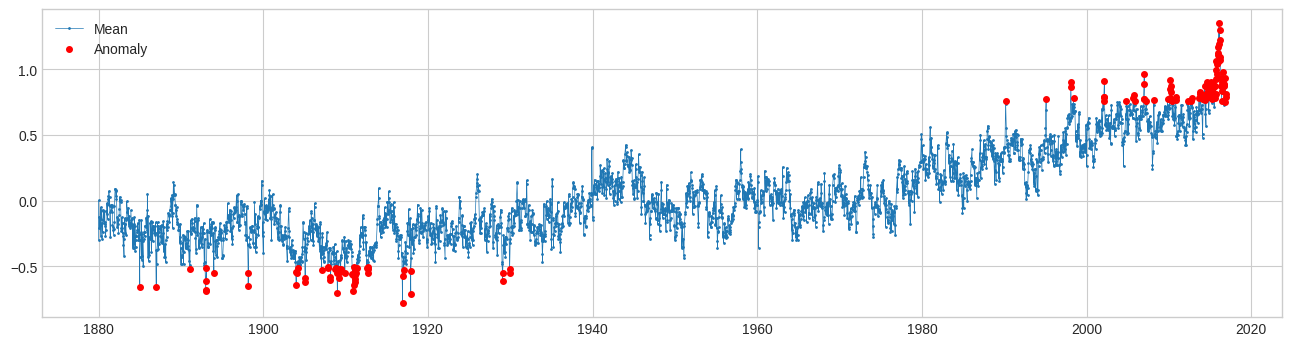

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Projects/monthly.csv")
data["Date"] = pd.to_datetime(data["Date"])
data = data.set_index("Date")
data = data["Mean"]
threshold_detector = ThresholdAD(low=-0.5, high=0.75)
anomalies = threshold_detector.detect(data)
plot(data, anomaly=anomalies, anomaly_color="red", anomaly_tag="marker")
plt.show()


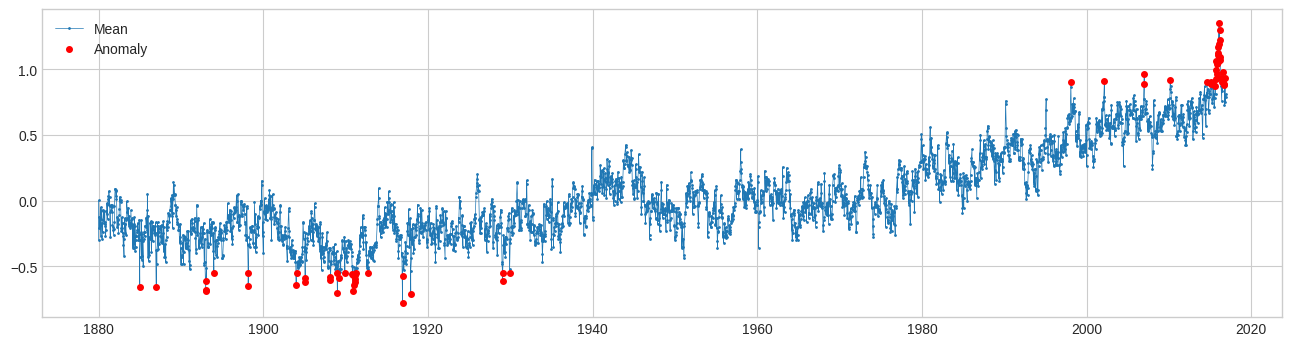

In [ ]:
quantile_detector = QuantileAD(low=0.01, high=0.99)
anomalies = quantile_detector.fit_detect(data)
plot(data, anomaly=anomalies, anomaly_color="red", anomaly_tag="marker")
plt.show()


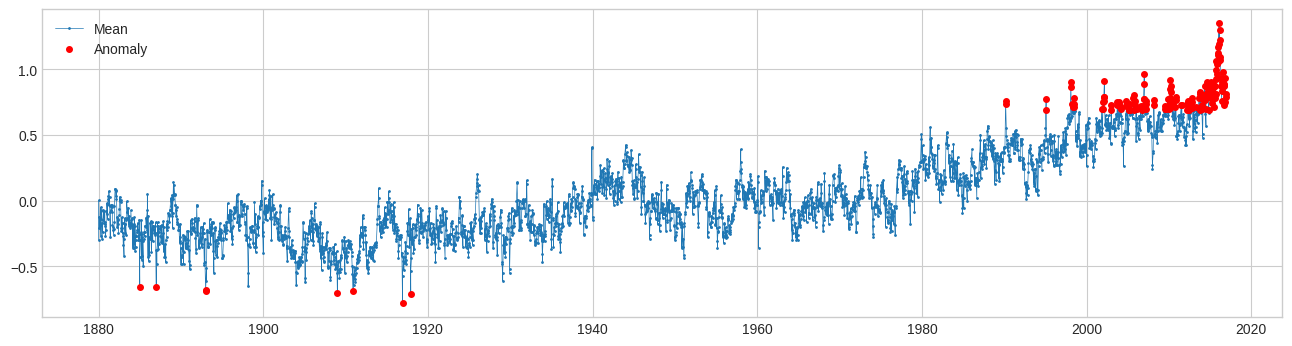

In [ ]:
iqr_detector = InterQuartileRangeAD(c=1)
anomalies = iqr_detector.fit_detect(data)
plot(data, anomaly=anomalies, anomaly_color="red", anomaly_tag="marker")
plt.show()

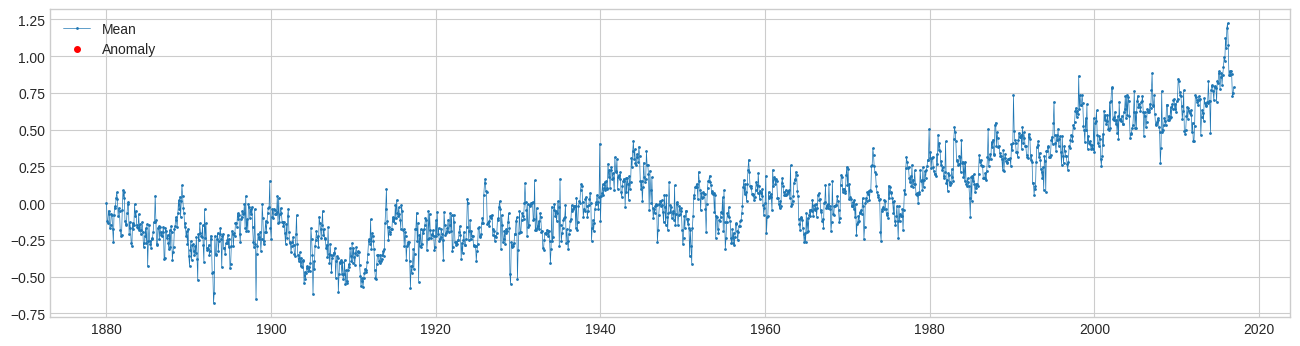

In [ ]:
esd_ad = GeneralizedESDTestAD(alpha=0.3)
data = validate_series(data)
anomalies = esd_ad.fit_detect(data)
plot(data, anomaly=anomalies, anomaly_color="red", anomaly_tag="marker")
plt.show()

[*********************100%***********************]  1 of 1 completed


/usr/local/lib/python3.9/dist-packages/adtk/data/_data.py:164: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t, v in time_window_end_series.iteritems():  # type: pd.Timestamp, int


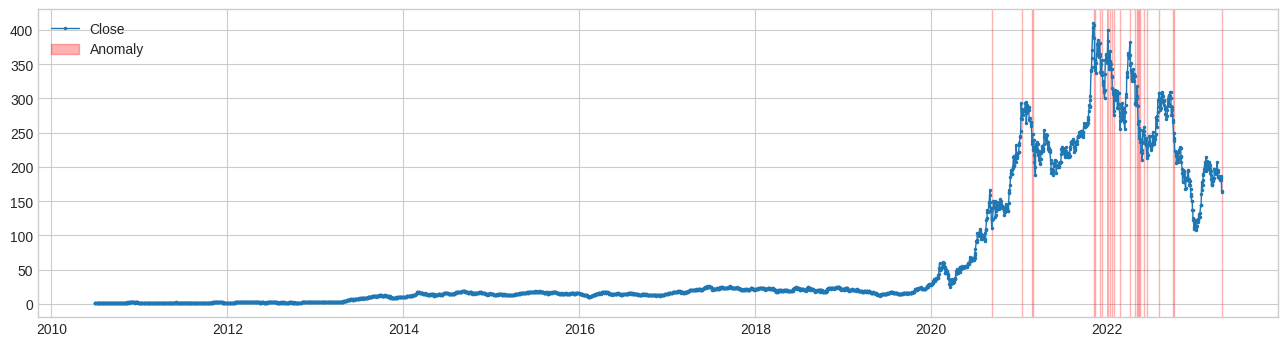

In [ ]:
data = yf.download("TSLA")['Close']
data = validate_series(data)
persist_detector = PersistAD(c=20.0, side="negative")
anomalies = persist_detector.fit_detect(data)
plot(data,anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_color="red");

[*********************100%***********************]  1 of 1 completed


/usr/local/lib/python3.9/dist-packages/adtk/data/_data.py:164: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t, v in time_window_end_series.iteritems():  # type: pd.Timestamp, int


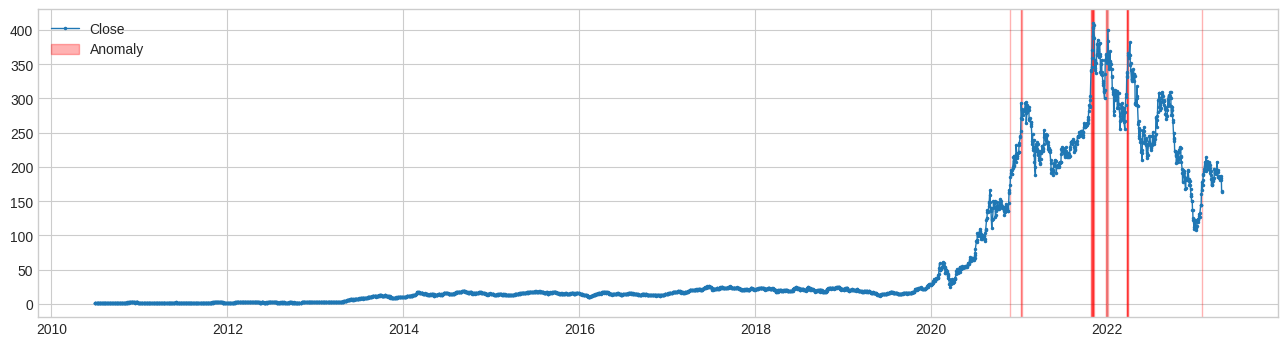

In [ ]:
data = yf.download("TSLA")['Close']
data = validate_series(data)
persist_detector = PersistAD(c=20.0, side="positive")
persist_detector.window = 10
anomalies = persist_detector.fit_detect(data)
plot(data,anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_color="red");

/usr/local/lib/python3.9/dist-packages/adtk/data/_data.py:164: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t, v in time_window_end_series.iteritems():  # type: pd.Timestamp, int


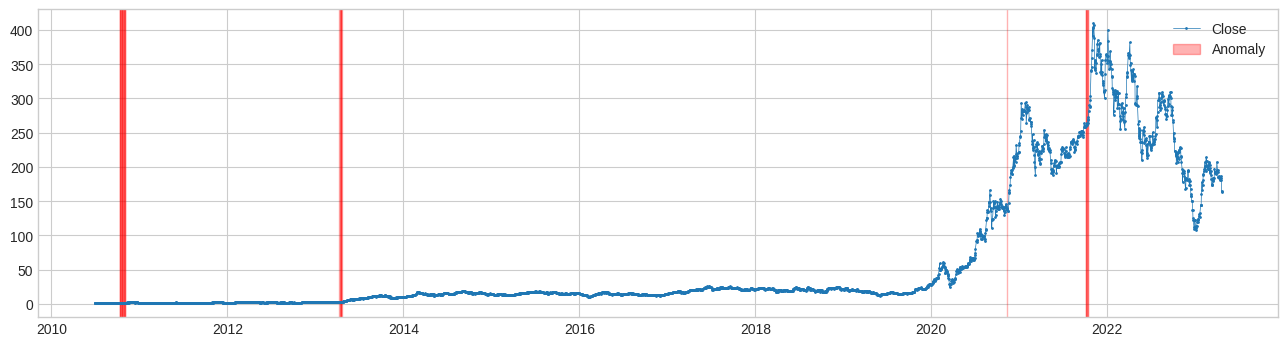

In [ ]:
volatility_detector = VolatilityShiftAD(c=10.0, side="positive", window=30)
anomalies = volatility_detector.fit_detect(data)
plot(data, anomaly=anomalies, anomaly_color="red");